[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

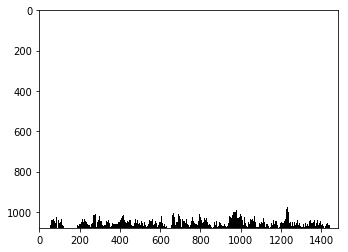

In [3]:
import cv2  
import numpy as np  
from matplotlib import pyplot as plt  
from PIL import Image
  
img=cv2.imread('22.jpg')  #读取图片，装换为可运算的数组
GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)   #将BGR图转为灰度图
ret,thresh1=cv2.threshold(GrayImage,130,255,cv2.THRESH_BINARY)  #将图片进行二值化（130,255）之间的点均变为255（背景）
# print(thresh1[0,0])#250  输出[0,0]这个点的像素值  				#返回值ret为阈值
# print(ret)#130
(h,w)=thresh1.shape #返回高和宽
# print(h,w)#s输出高和宽
a = [0 for z in range(0, w)] 
print(a) #a = [0,0,0,0,0,0,0,0,0,0,...,0,0]初始化一个长度为w的数组，用于记录每一列的黑点个数  
 
#记录每一列的波峰
for j in range(0,w): #遍历一列 
    for i in range(0,h):  #遍历一行
        if  thresh1[i,j]==0:  #如果改点为黑点
            a[j]+=1  		#该列的计数器加一计数
            thresh1[i,j]=255  #记录完后将其变为白色 
    # print (j)           
 
#            
for j  in range(0,w):  #遍历每一列
    for i in range((h-a[j]),h):  #从该列应该变黑的最顶部的点开始向最底部涂黑
        thresh1[i,j]=0   #涂黑
 
#此时的thresh1便是一张图像向垂直方向上投影的直方图
#如果要分割字符的话，其实并不需要把这张图给画出来，只需要的到a=[]即可得到想要的信息
 
 
# img2 =Image.open('0002.jpg')
# img2.convert('L')
# img_1 = np.array(img2)
plt.imshow(thresh1,cmap=plt.gray())
plt.show()
cv2.imshow('img',thresh1)  
cv2.waitKey(0)  
cv2.destroyAllWindows() 